<a href="https://colab.research.google.com/github/sankichi92/satelliteBook/blob/main/notebooks/4-5-coast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4-5 浜辺の侵食の様子を確認する

[『Pythonで学ぶ衛星データ解析基礎』](https://gihyo.jp/book/2022/978-4-297-13232-3)第4章 衛星データ解析手法別演習 [解析編] より。

In [1]:
!date --rfc-3339=seconds

2023-01-07 10:28:22+00:00


In [2]:
!python --version

Python 3.8.16


In [3]:
!pip install pystac-client>=0.5.1 stackstac>=0.4.3 rioxarray>=0.13.3

In [4]:
%config InlineBackend.figure_formats = ['retina']

In [5]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['figure.dpi'] = 100

## 海岸線抽出のための前処理作業

2期間について被雲率の低い Sentinel 2 のデータを Earth Search で検索する。

In [6]:
aoi_bbox = [140.3839874267578, 35.32184842037683, 140.7300567626953, 35.706377408871774] # 九十九里浜
datetimes = ['2019-02', '2021-02']

In [7]:
from pystac_client import Client
client = Client.open('https://earth-search.aws.element84.com/v0')

aoi_items = []
for datetime in datetimes:
  res = client.search(
      collections='sentinel-s2-l2a-cogs',
      bbox=aoi_bbox,
      datetime=datetime,
      query=['sentinel:valid_cloud_cover=true']
  )
  print(res.matched())
  item = min(res.items(), key=lambda item: item.properties['eo:cloud_cover'])
  aoi_items.append(item)

11
13


In [8]:
aoi_items[0]

<Item id=S2B_54SVE_20190202_0_L2A>

In [9]:
from IPython.display import Image
Image(url=aoi_items[0].assets['thumbnail'].href)

In [10]:
aoi_items[1]

<Item id=S2B_54SVE_20210221_0_L2A>

In [11]:
Image(url=aoi_items[1].assets['thumbnail'].href)

検索結果を xarray.DataArray として読み込み、関心領域でクリップする。

In [12]:
import stackstac
import rioxarray

aoi_stack = stackstac.stack(aoi_items, assets=['B02', 'B03', 'B04', 'B08'])
aoi_stack = aoi_stack.rio.clip_box(*aoi_bbox, crs='EPSG:4326')
aoi_stack.load()

<xarray.DataArray 'stackstac-a8c313ab65104fc19a82c1bf739bdabd' (time: 2,
                                                                band: 4,
                                                                y: 4280, x: 3158)>
array([[[[ 439.,  418.,  391., ...,  761., 1021.,  703.],
         [ 381.,  410.,  373., ...,  874., 1168.,  721.],
         [ 375.,  386.,  378., ...,  919., 1150.,  651.],
         ...,
         [ 639.,  636.,  403., ...,  288.,  276.,  274.],
         [ 661.,  604.,  440., ...,  292.,  282.,  278.],
         [ 730.,  565.,  505., ...,  294.,  295.,  294.]],

        [[ 605.,  755.,  723., ...,  962., 1246.,  900.],
         [ 681.,  745.,  719., ..., 1034., 1338.,  902.],
         [ 727.,  727.,  683., ..., 1070., 1334.,  810.],
         ...,
         [ 767.,  746.,  463., ...,  162.,  162.,  160.],
         [ 848.,  697.,  492., ...,  182.,  169.,  178.],
         [ 885.,  641.,  547., ...,  176.,  153.,  167.]],

        [[ 650.,  526.,  473., ..., 1110., 1326.,  933.],
         [ 632.,  519.,  463., ..., 1240., 1472.,  841.],
         [ 593.,  495.,  470., ..., 1214., 1450.,  758.],
         ...,
...
         ...,
         [ 899.,  825.,  734., ...,  224.,  218.,  208.],
         [ 938.,  833.,  706., ...,  210.,  199.,  214.],
         [ 963.,  824.,  686., ...,  218.,  189.,  208.]],

        [[1108., 1804., 1908., ..., 1336., 1026., 1376.],
         [1310., 1892., 1940., ..., 1320.,  988., 1600.],
         [1476., 1836., 1892., ..., 1332., 1054., 1626.],
         ...,
         [1140.,  975.,  895., ...,  173.,  165.,  160.],
         [1154.,  928.,  878., ...,  163.,  139.,  150.],
         [1128.,  924.,  852., ...,  171.,  152.,  143.]],

        [[1864., 2338., 2428., ..., 2998., 3260., 2584.],
         [2040., 2424., 2446., ..., 2866., 3464., 2872.],
         [2184., 2412., 2440., ..., 2778., 3338., 2776.],
         ...,
         [2042., 1970., 1574., ...,  138.,  105.,  115.],
         [2190., 2100., 1918., ...,  136.,  109.,  127.],
         [2188., 2138., 2138., ...,  119.,  136.,  155.]]]])
Coordinates: (12/29)
  * time                        (time) datetime64[ns] 2019-02-02T01:37:18 202...
    id                          (time) <U24 'S2B_54SVE_20190202_0_L2A' 'S2B_5...
  * band                        (band) <U3 'B02' 'B03' 'B04' 'B08'
  * x                           (x) float64 4.44e+05 4.44e+05 ... 4.756e+05
  * y                           (y) float64 3.952e+06 3.952e+06 ... 3.909e+06
    gsd                         int64 10
    ...                          ...
    proj:shape                  object {10980}
    common_name                 (band) <U5 'blue' 'green' 'red' 'nir'
    center_wavelength           (band) float64 0.4966 0.56 0.6645 0.8351
    full_width_half_max         (band) float64 0.098 0.045 0.038 0.145
    epsg                        int64 32654
    spatial_ref                 int64 0
Attributes:
    spec:        RasterSpec(epsg=32654, bounds=(399960.0, 3890220.0, 509760.0...
    resolution:  10.0

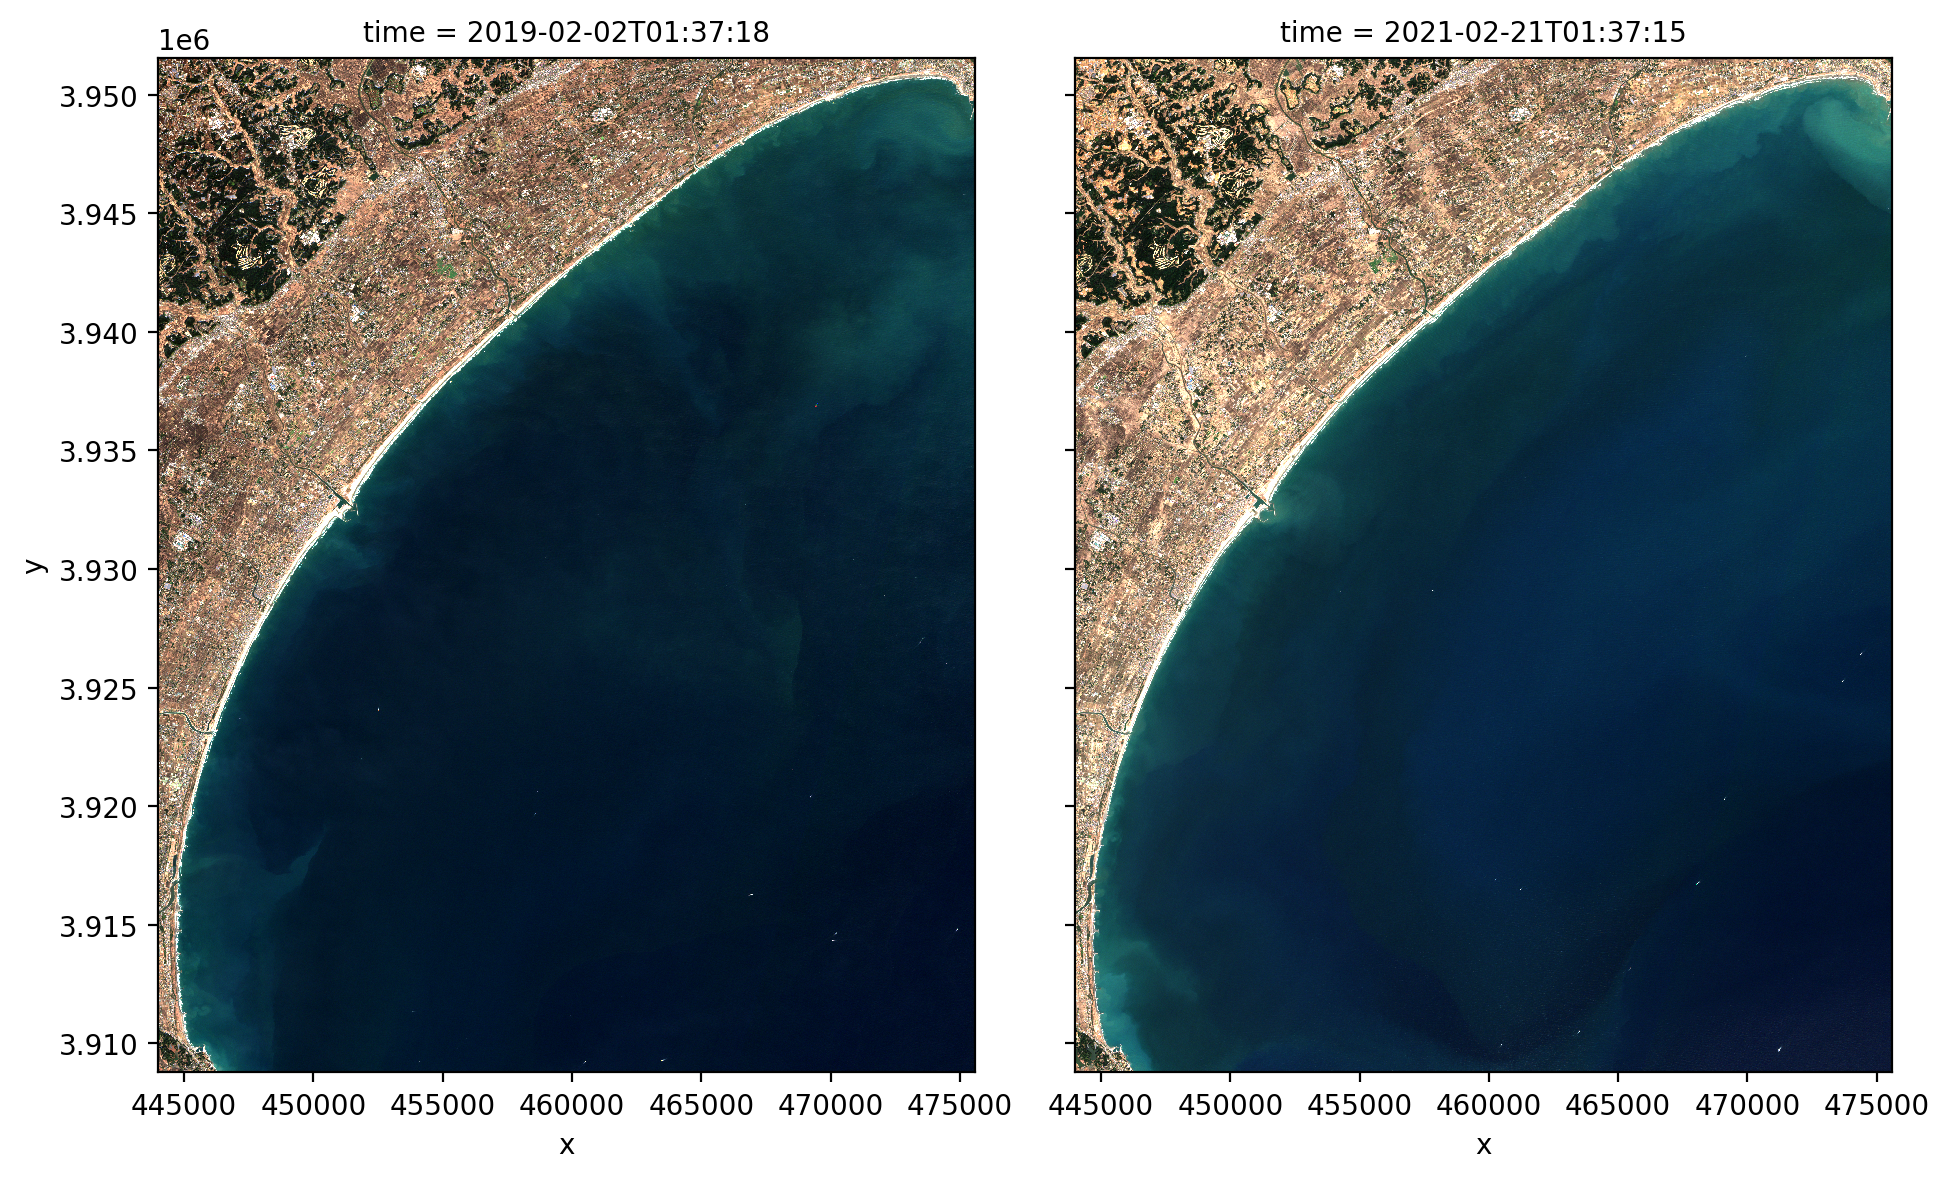

In [13]:
aoi_stack.sel(band=['B04', 'B03', 'B02']).plot.imshow(
    rgb='band',
    col='time',
    size=6,
    aspect=aoi_stack.coords['x'].size / aoi_stack.coords['y'].size,
    robust=True
)

近赤外（B08）も利用する形で画像表示する。

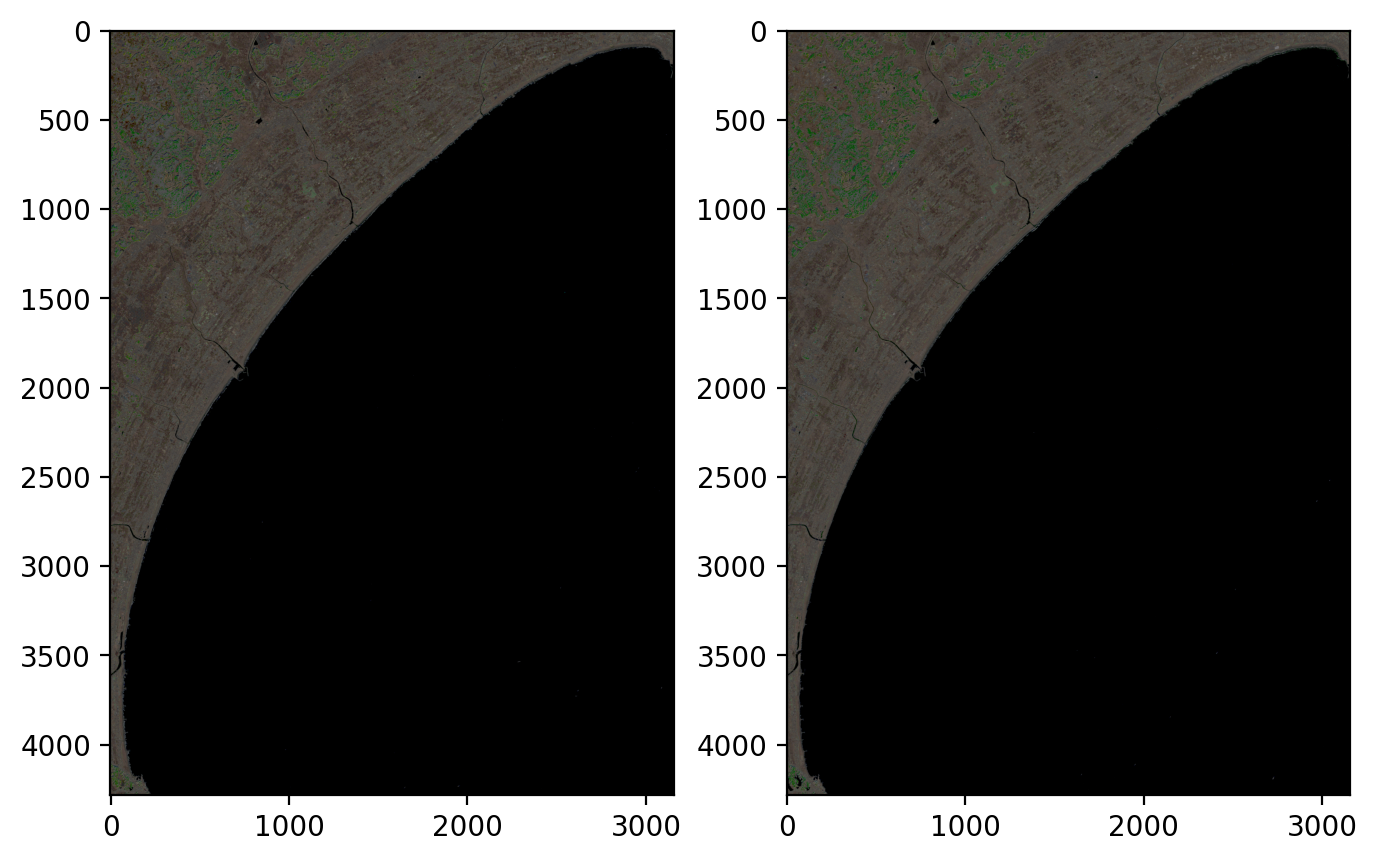

In [14]:
import cv2
import numpy as np

def gamma_correction(image, gamma=3.0):
  lookup_table = [(i / 255) ** (1 / gamma) * 255 for i in np.arange(0, 256)]
  return cv2.LUT(image, np.array(lookup_table, dtype='uint8'))

_fig, axs = plt.subplots(1, 2)
for ax, data in zip(axs, aoi_stack):
  # HSV に変換する
  image = (data.sel(band=['B02', 'B03', 'B04']).transpose('y', 'x', 'band') // 256).astype('uint8')
  image = cv2.cvtColor(image.values, cv2.COLOR_BGR2HSV)
  # HSV の明度 (V) を B08 (NIR) の値で置き換える
  image[:, :, 2] = data.sel(band='B08') // 256
  # RGB に変換する
  image = cv2.cvtColor(image, cv2.COLOR_HSV2RGB)
  # ガンマ補正する
  image = gamma_correction(image)
  ax.imshow(image)

## クラスタリングを行う

k-means 法で画素値を2つのクラスタに分類する。

In [15]:
from sklearn.cluster import KMeans

X = aoi_stack.transpose('time', 'y', 'x', 'band').values.reshape(-1, data.coords['band'].size)
kmeans = KMeans(n_clusters=2)
clustering_results = kmeans.fit_predict(X).reshape(
    aoi_stack.coords['time'].size, aoi_stack.coords['y'].size, aoi_stack.coords['x'].size
)

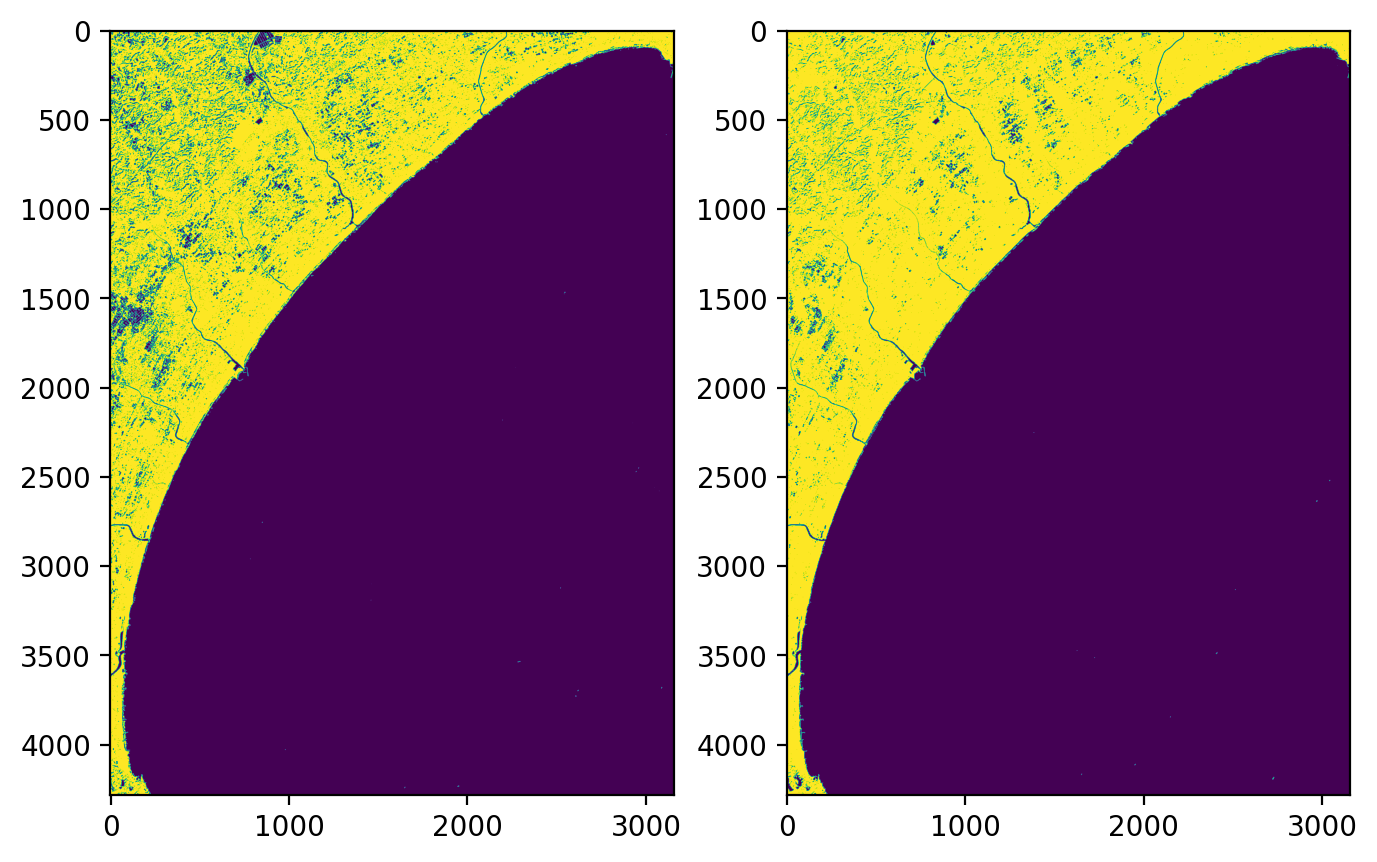

In [16]:
_fig, axs = plt.subplots(1, 2)
for ax, clustered in zip(axs, clustering_results):
  ax.imshow(clustered)

分類結果にガウスフィルタをかけてノイズ除去する。

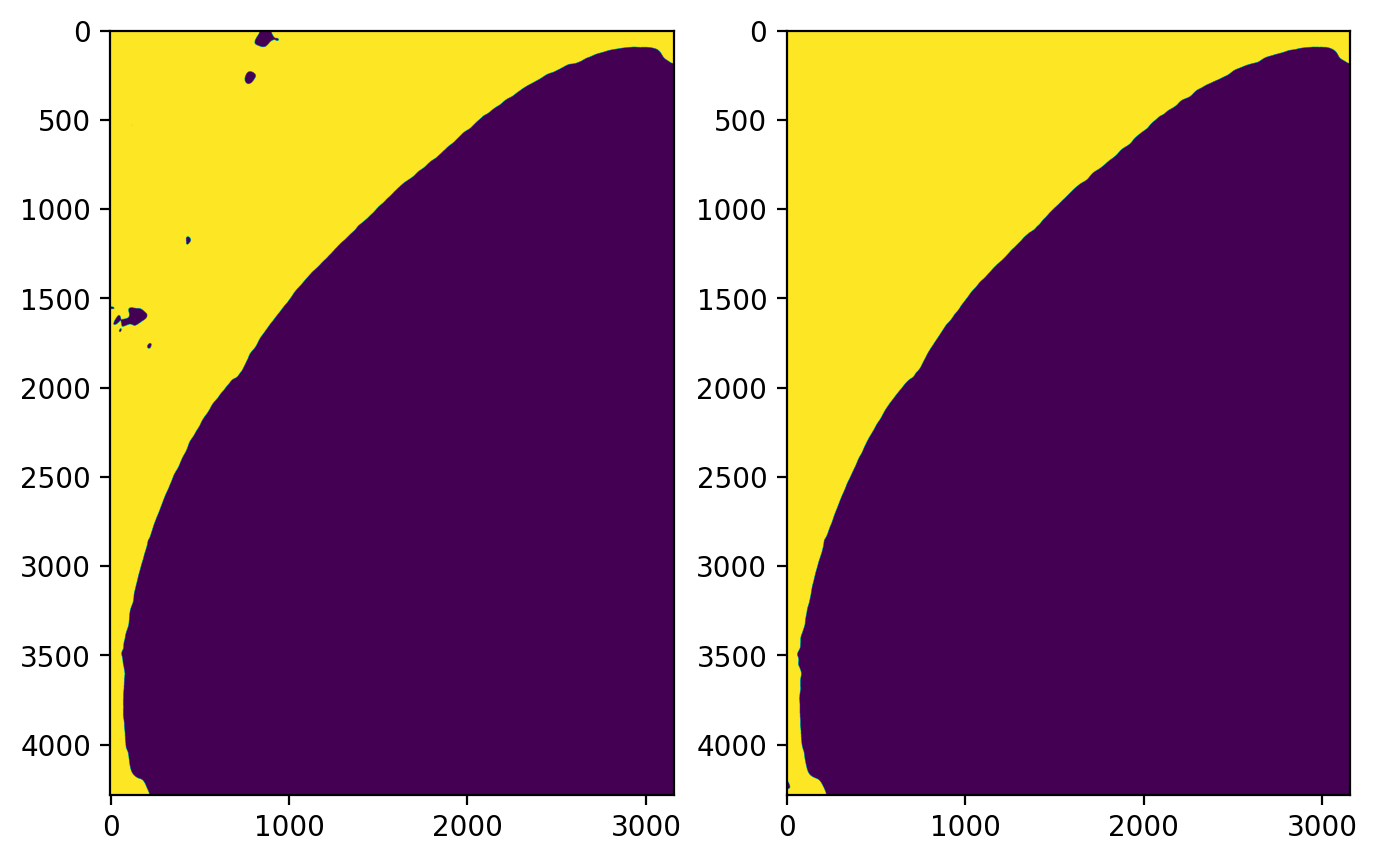

In [17]:
blurred_results = []
_fig, axs = plt.subplots(1, 2)
for ax, image in zip(axs, clustering_results):
  blurred_image = cv2.GaussianBlur(image.astype('uint8'), ksize=(101, 101), sigmaX=0)
  blurred_results.append(blurred_image)
  ax.imshow(blurred_image)

2期間の差を表示する。

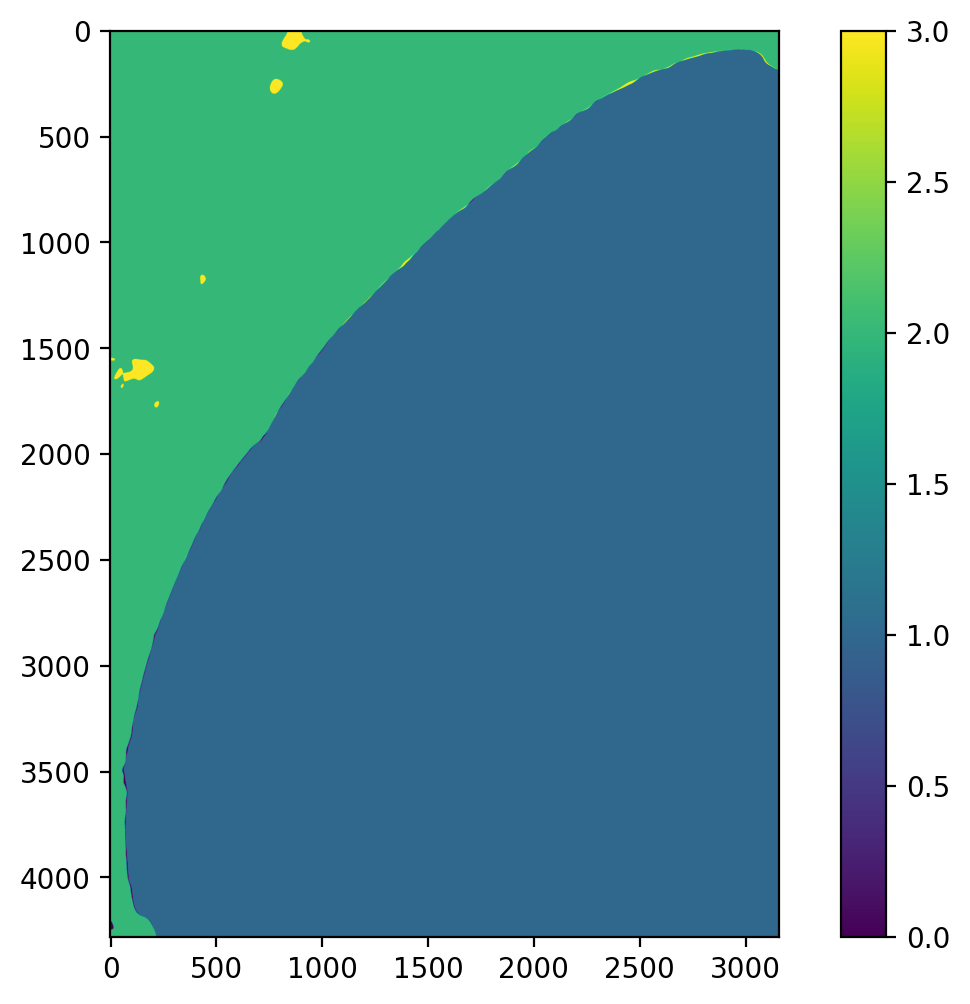

In [18]:
# 0→1: 3
# 1→1: 2
# 0→0: 1
# 1→0: 0
diff = blurred_results[1] * 2 + 1 - blurred_results[0]

fig, ax = plt.subplots()
img = ax.imshow(diff)
fig.colorbar(img)

ピクセル等倍で画像表示する。

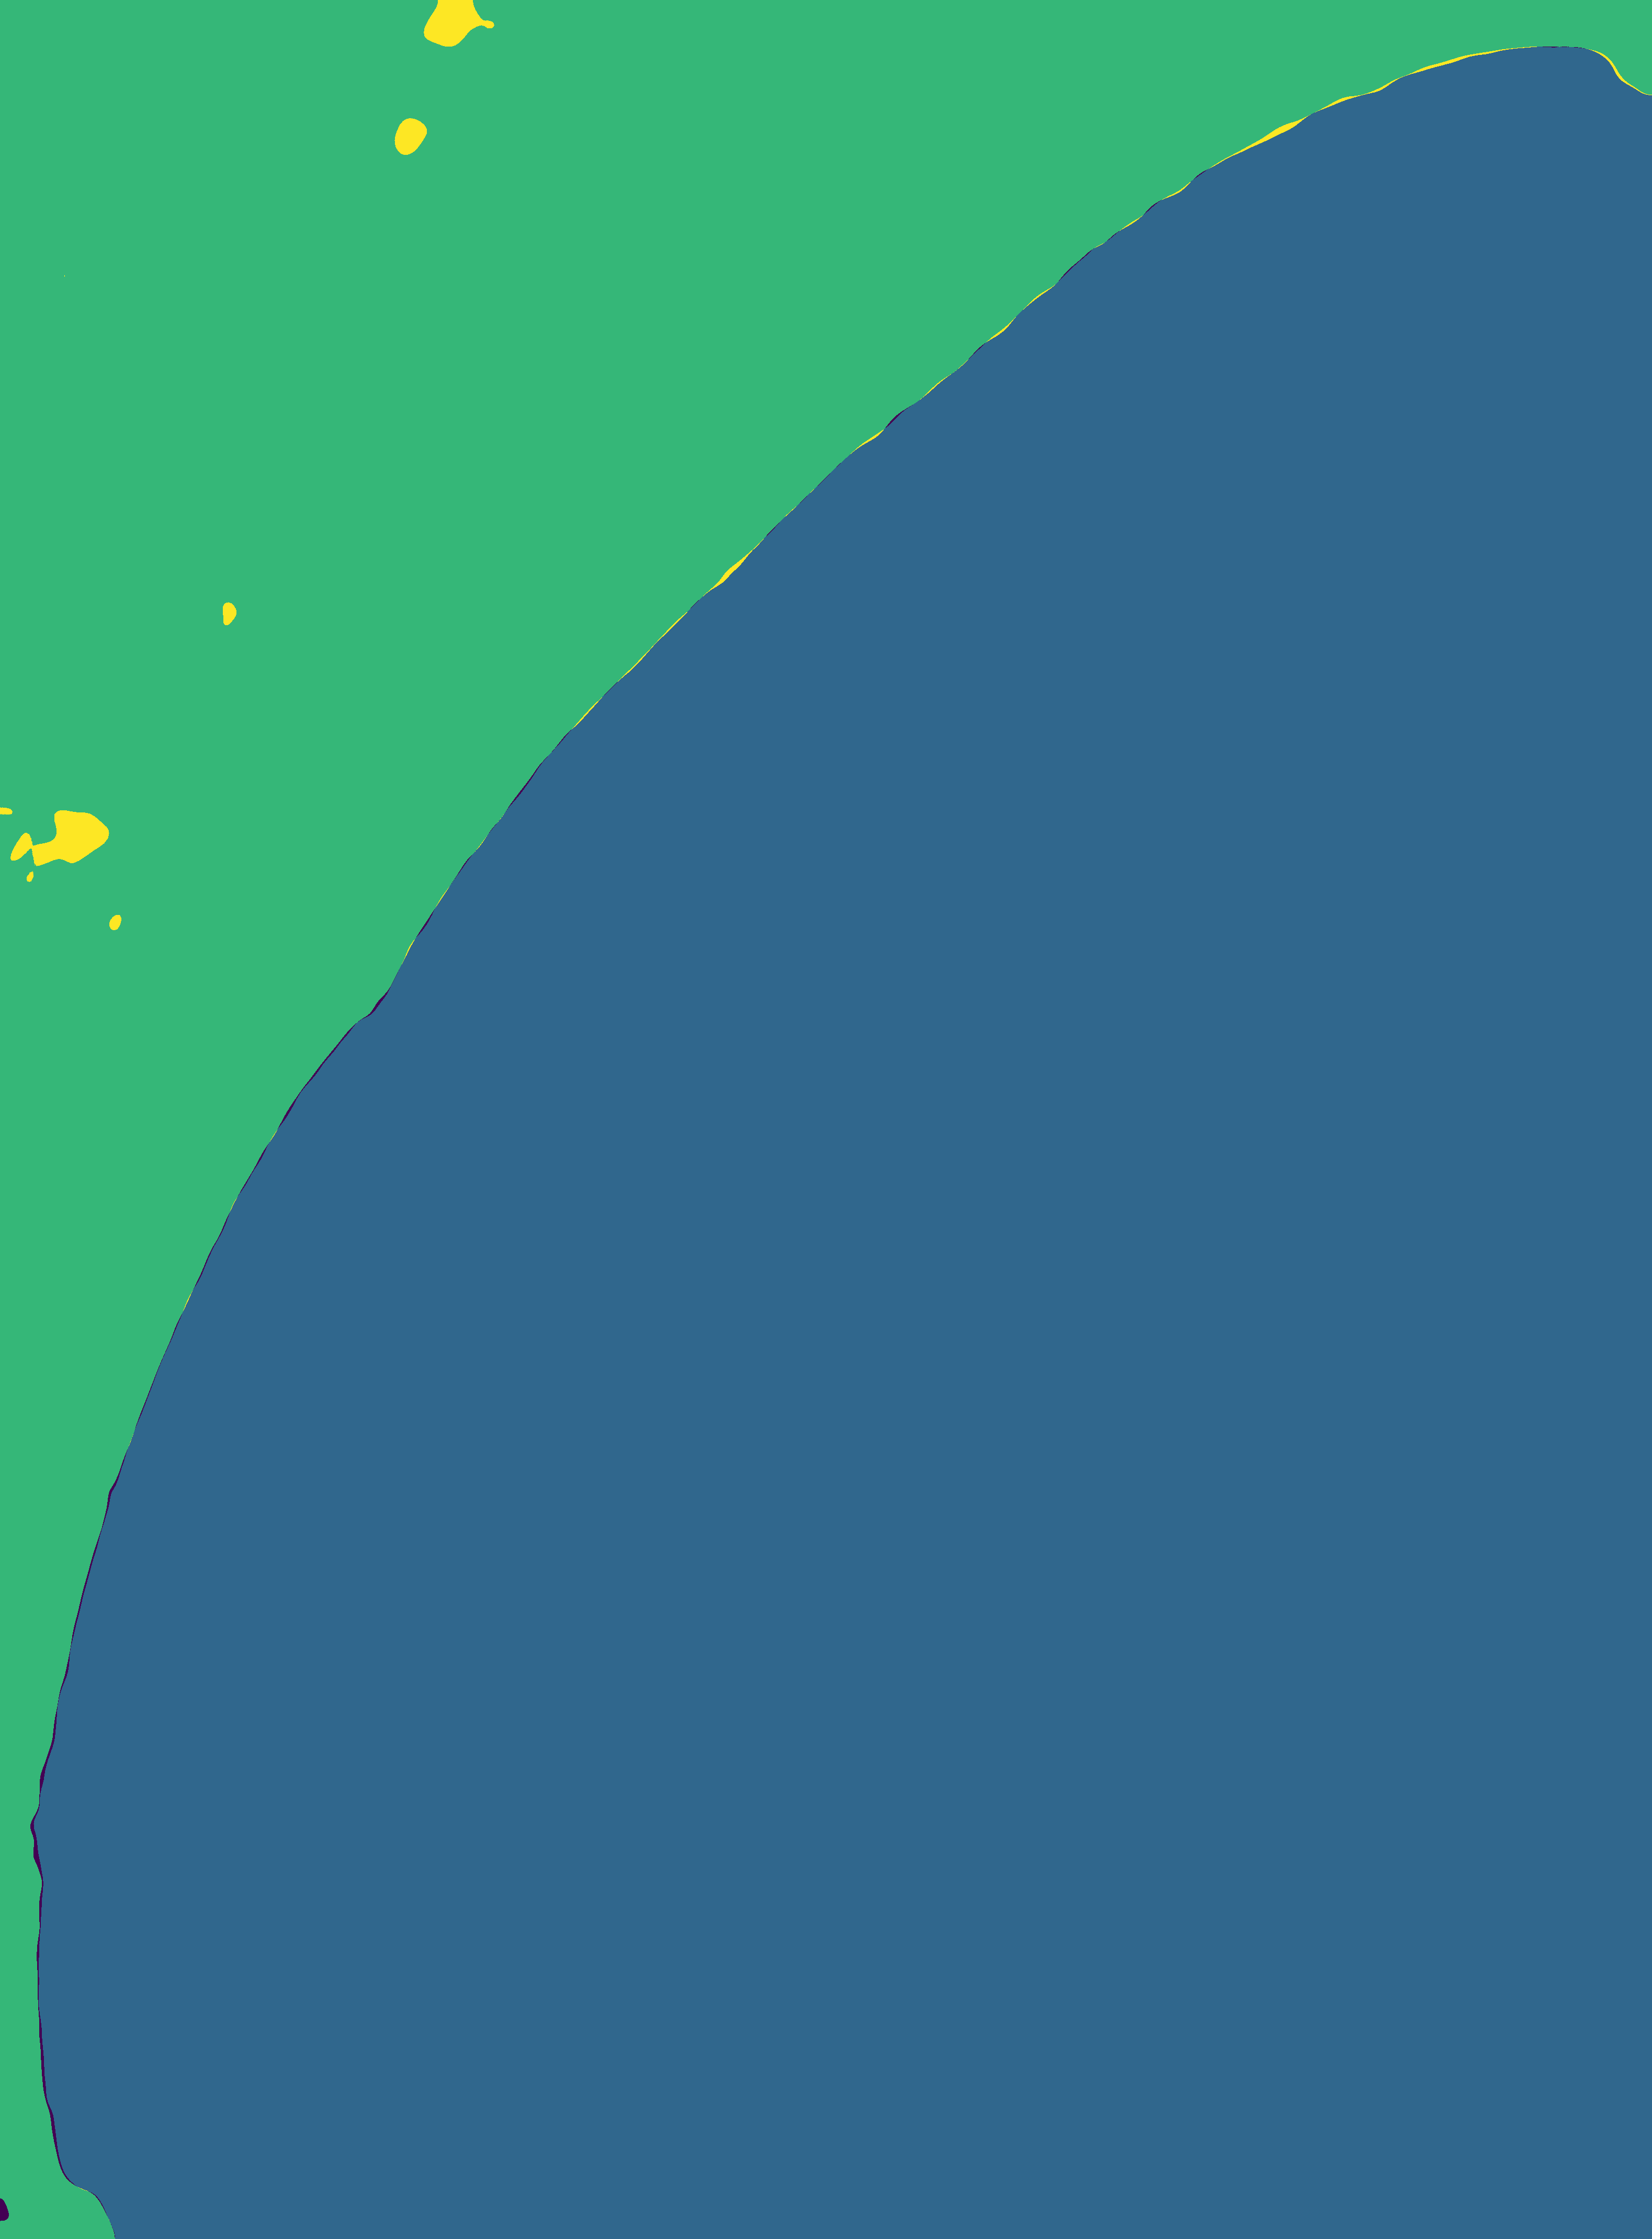

In [19]:
fig, _ax = plt.subplots(figsize=(19.565, 27.695))
fig.figimage(diff)